In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib

In [11]:
sig = gpd.read_file('./data/sig_20230729/sig.shp', encoding='cp949')
sig.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


In [12]:
seoul = sig[sig['SIG_CD'].str.startswith('11')]

In [13]:
seoul.drop(['SIG_CD', 'SIG_ENG_NM'], axis=1, inplace=True)
seoul.columns = ['자치구명', 'geometry']

/var/folders/qr/d0tz05096cq7wtbf54br3qsw0000gn/T/ipykernel_35154/1333138997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul.drop(['SIG_CD', 'SIG_ENG_NM'], axis=1, inplace=True)


In [14]:
seoul.head()

,자치구명,geometry
0,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


In [15]:
env_index = pd.read_csv('./result/seoul_env_index.csv', encoding='utf-8')
env_index.head()

,자치구명,환경생태지수
0,종로구,7.622158
1,중구,1.334174
2,용산구,0.209415
3,성동구,1.490077
4,광진구,2.077959


In [16]:
matplotlib.rcParams['font.family'] = 'appleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

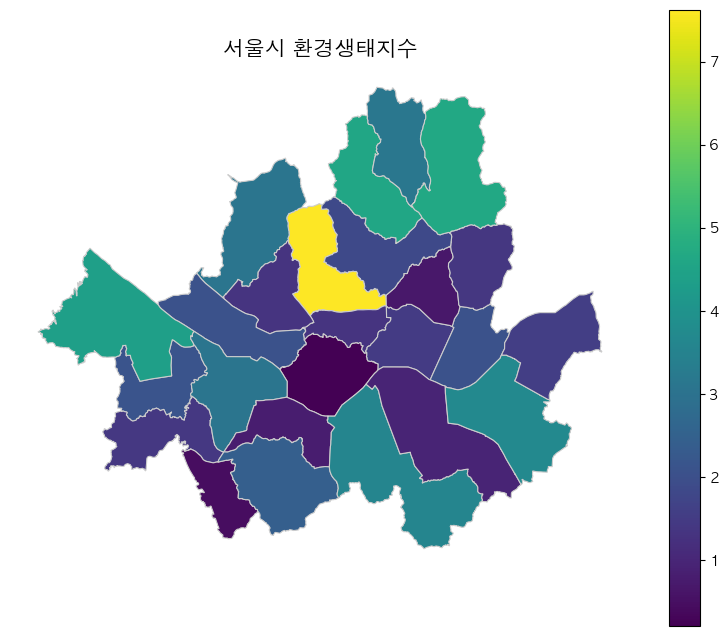

In [17]:
merged_df = pd.merge(seoul, env_index, on='자치구명')

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_df.plot(column='환경생태지수', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('서울시 환경생태지수', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.axis('off')
plt.savefig('./result/seoul_env_index.png')
plt.show()